<a href="https://colab.research.google.com/github/jmestralet/Proyecto_DS_Coderhouse/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al dataset elegido

El presente trabajo, parte de un dataset de clientes de un comercio, disponible en la Web.

Este incluye datos respecto a: aspectos demograficos del cliente, comportamiento de compra,satisfacción respecto al servicio, relacion actual con la empresa, datos geográficos de los puntos de venta, entre otros.

## Listado de columnas y significado:

*  ID de cliente:	Identificador único para cada cliente.
*  Edad:	edad del cliente
* Género	El género del cliente (Hombre, Mujer, Otro).
* Tipo de cuenta	Tipo de cuenta (Corriente, Ahorro, Inversión).
* Saldo de la cuenta	El saldo en la cuenta del cliente, indica estabilidad financiera.
* Fecha de transacción	Fecha de la última transacción realizada por el cliente.
* Monto de la transacción	Importe de la última transacción, indicando el compromiso del cliente.
* Tipo de transacción	Tipo de la última transacción (Depósito, Retiro, etc.).
* Rama	Ubicación de la sucursal donde se encuentra la cuenta.
* Monto del préstamo	Importe de cualquier préstamo obtenido por el cliente.
* Puntuación crediticia	La puntuación crediticia del cliente, que indica su salud financiera.
* Está_empleado	Si el cliente está empleado (Verdadero/Falso).
* Ingresos anuales	El ingreso anual total del cliente.
* Estado civil	El estado civil del cliente (soltero, casado, etc.).
* Sucursal:	La región geográfica del cliente.
* Fecha de apertura de la cuenta	La fecha en que se abrió la cuenta del cliente.
* Fecha de la última transacción	Fecha de la más reciente transacción realizada por el cliente.
* Número_de_transacciones	Número total de transacciones en el último año.
* Tendencia de actividad de la cuenta	Si la actividad de la cuenta está aumentando, disminuyendo o es estable.
* Interacciones de servicio al cliente	Número de interacciones con el servicio de atención al cliente que posiblemente indiquen insatisfacción.
*Quejas recientes	Número de quejas realizadas por el cliente, que potencialmente indican insatisfacción.
* Cambio en el saldo de la cuenta	Cambio en el saldo de la cuenta a lo largo del tiempo, lo que indica estabilidad o dificultad financiera.
* Puntuación de satisfacción del cliente	Calificación de satisfacción del cliente (1-5), donde las puntuaciones más bajas indican un mayor riesgo de abandono.
* Etiqueta de abandono	Indica si el cliente ha abandonado el servicio (1) o no (0).
* Periodo de tiempo de abandono	Si se agita, el número de meses hace que ocurrió.

Fuente del dataset: https://www.kaggle.com/datasets/simronw/churn-prediction-unlocking-retention-secrets

## Objetivo del proyecto:
Partiendo de los datos anteriores, se busca encontrar caracteristicas y/o patrones que permitan identificar clientes con alta propabilidad de fugarse.


#Importación de librerías
Se importan todas las librerías que serán utilizadas en el proyecto

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Ignorar todos los warnings
warnings.filterwarnings('ignore')

## Carga  del dataset y primeras transformaciones
El dataset se encuentra en formato csv, por lo que se carga de la siguiente forma.

In [158]:
df = pd.read_csv('Abandono_de_clientes.csv', sep=';')

Antes de comenzar a explorar los datos, se traducen los nomnbres de las columnas a Español:

In [159]:
print('Columnas:')
df.columns


Columnas:


Index(['Customer_ID', 'Age', 'Gender', 'Account_Type', 'Account_Balance',
       'Transaction_Date', 'Transaction_Amount', 'Transaction_Type', 'Branch',
       'Loan_Amount', 'Loan_Type', 'Credit_Score', 'Is_Employed',
       'Annual_Income', 'Marital_Status', 'Region', 'Account_Open_Date',
       'Last_Transaction_Date', 'Number_of_Transactions',
       'Account_Activity_Trend', 'Customer_Service_Interactions',
       'Recent_Complaints', 'Change_in_Account_Balance',
       'Customer_Satisfaction_Score', 'Churn_Label', 'Churn_Timeframe'],
      dtype='object')

In [160]:
df=df.rename(columns={'Customer_ID':'Cliente_ID',
                      'Age':'Edad',
                      'Gender':'Genero',
                      'Account_Type':'Tipo de cuenta',
                      'Account_Balance':'Saldo de cuenta',
                      'Transaction_Date':'Fecha de transaccion',
                      'Transaction_Amount':'Monto de transaccion',
                      'Transaction_Type':'Tipo de transaccion',
                      'Branch':'Rama',
                      'Loan_Amount':'Monto de prestamo',
                      'Loan_Type':'Tipo de prestamo',
                      'Credit_Score':'Score crediticio',
                      'Is_Employed':'Es empleado',
                      'Annual_Income':'Ingreso anual',
                      'Marital_Status':'Estado Civil',
                      'Account_Open_Date':'Fecha de apertura de cuenta',
                      'Last_Transaction_Date':'Fecha de ultima transaccion',
                      'Number_of_Transactions':'Numero de transacciones',
                      'Account_Activity_Trend':'Tendencia de actividad en cuenta',
                      'Customer_Service_Interactions':'Interacciones de servicio al cliente',
                      'Recent_Complaints':'Quejas recientes',
                      'Change_in_Account_Balance':'Cambio en saldo de cuenta',
                      'Customer_Satisfaction_Score':'Puntuación de satisfacción del cliente',
                      'Churn_Label':'Etiqueta de abandono',
                      'Churn_Timeframe':'Periodo de tiempo de abandono (meses)'})
print('Columnas renombradas:')
df.columns

Columnas renombradas:


Index(['Cliente_ID', 'Edad', 'Genero', 'Tipo de cuenta', 'Saldo de cuenta',
       'Fecha de transaccion', 'Monto de transaccion', 'Tipo de transaccion',
       'Rama', 'Monto de prestamo', 'Tipo de prestamo', 'Score crediticio',
       'Es empleado', 'Ingreso anual', 'Estado Civil', 'Region',
       'Fecha de apertura de cuenta', 'Fecha de ultima transaccion',
       'Numero de transacciones', 'Tendencia de actividad en cuenta',
       'Interacciones de servicio al cliente', 'Quejas recientes',
       'Cambio en saldo de cuenta', 'Puntuación de satisfacción del cliente',
       'Etiqueta de abandono', 'Periodo de tiempo de abandono (meses)'],
      dtype='object')

Se observan algunos registros y columnas para observar la composición de la tabla

In [161]:
print('Primeros 4 registros:')
df.head(4)

Primeros 4 registros:


,Cliente_ID,Edad,Genero,Tipo de cuenta,Saldo de cuenta,Fecha de transaccion,Monto de transaccion,Tipo de transaccion,Rama,Monto de prestamo,...,Fecha de apertura de cuenta,Fecha de ultima transaccion,Numero de transacciones,Tendencia de actividad en cuenta,Interacciones de servicio al cliente,Quejas recientes,Cambio en saldo de cuenta,Puntuación de satisfacción del cliente,Etiqueta de abandono,Periodo de tiempo de abandono (meses)
0,8f0b813f-971a-45c8-8347-48a0d5cd3f2e,50,Female,Savings,26046.21,14/2/2025,4819.48,Payment,Freemanview,1063.29,...,26/8/2022,24/3/2025,8,Increasing,1,2,-1024.51,1,1,1
1,ec299825-6aa6-47f3-bfc0-0b65d3d4b1e3,69,Female,Checking,27415.23,26/2/2025,3072.79,Deposit,Floresmouth,35493.90,...,18/6/2024,2/3/2025,4,Stable,1,0,-2900.10,3,0,0
2,3f992fba-cd14-417e-b5d9-55173b985bef,38,Female,Checking,86709.64,26/3/2025,1423.93,Deposit,West Francis,0.00,...,17/8/2020,13/3/2025,2,Increasing,4,0,-2600.01,1,0,0
3,be551680-156f-4f47-b283-192bbcb80571,57,Male,Savings,56826.79,25/2/2025,3929.43,Deposit,Diazport,41939.84,...,15/9/2023,26/3/2025,18,Stable,0,2,154.73,1,1,11


Columnas del dataframe

In [162]:
print('Columnas del dataframe')
df.dtypes

Columnas del dataframe


,0
Cliente_ID,object
Edad,int64
Genero,object
Tipo de cuenta,object
Saldo de cuenta,float64
Fecha de transaccion,object
Monto de transaccion,float64
Tipo de transaccion,object
Rama,object
Monto de prestamo,float64


Se cambia el formato de algunas columnas

In [163]:
fecha_corte='2025-03-31'
df['Fecha_corte']= pd.to_datetime(fecha_corte)
df['Fecha de transaccion'] = pd.to_datetime(df['Fecha de transaccion'])
df['Fecha de apertura de cuenta'] = pd.to_datetime(df['Fecha de apertura de cuenta'])
df['Fecha de ultima transaccion'] = pd.to_datetime(df['Fecha de ultima transaccion'])


Se crean variables que resultarán de utilidad en el análisis

In [109]:
#Antiguedad en años: indica la cantidad de años que el cliente pertenece a la empresa
df['Antiguedad en años'] = (df['Fecha_corte'] - df['Fecha de apertura de cuenta']).dt.days / 365
#Frecuencia de transacciones por año
df['Frecuencia de transacciones por año'] = df['Numero de transacciones']/df['Antiguedad en años']
#Recencia: indica el tiempo desde la última transacción
df['Recencia'] = (df['Fecha_corte'] - df['Fecha de ultima transaccion']).dt.days


Estructura del dataframe

In [165]:
filas, columnas = df.shape
print(f'El df esta compuesto por {filas} filas y {columnas} columnas')

El df esta compuesto por 5000 filas y 28 columnas


Detalle de las columnas

In [113]:
df.info()

Detalle de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Cliente_ID                              5000 non-null   object        
 1   Edad                                    5000 non-null   int64         
 2   Genero                                  5000 non-null   object        
 3   Tipo de cuenta                          5000 non-null   object        
 4   Saldo de cuenta                         5000 non-null   float64       
 5   Fecha de transaccion                    5000 non-null   datetime64[ns]
 6   Monto de transaccion                    5000 non-null   float64       
 7   Tipo de transaccion                     5000 non-null   object        
 8   Rama                                    5000 non-null   object        
 9   Monto de prestamo          

Se observan valores nulos en la columna 'Tipo de Prestamo'. Se procede a chequear los nulos por columna, a fin de realizar un segundo chequeo.

##Chequeo de valores nulos

In [167]:
# Calcular el porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((df.isnull().sum() / len(df)) * 100)


Porcentaje de valores nulos por columna:
Cliente_ID                                 0.0
Edad                                       0.0
Genero                                     0.0
Tipo de cuenta                             0.0
Saldo de cuenta                            0.0
Fecha de transaccion                       0.0
Monto de transaccion                       0.0
Tipo de transaccion                        0.0
Rama                                       0.0
Monto de prestamo                          0.0
Tipo de prestamo                          76.0
Score crediticio                           0.0
Es empleado                                0.0
Ingreso anual                              0.0
Estado Civil                               0.0
Region                                     0.0
Fecha de apertura de cuenta                0.0
Fecha de ultima transaccion                0.0
Numero de transacciones                    0.0
Tendencia de actividad en cuenta           0.0
Interacciones de s

Se define un umbral del 30%, para los nulos por columna, y se eliminan aquellas que no superen el mismo

In [169]:
# Definir un umbral
umbral = 0.3 * len(df)

# Identificar columnas a eliminar
columnas_a_eliminar = df.columns[df.isnull().sum() > umbral]
print("Columnas a eliminar, con más del 30% de NaN:", columnas_a_eliminar.tolist())

# Eliminar las columnas identificadas
df.drop(columns=columnas_a_eliminar, inplace=True)

print("\nTamaño del DataFrame original:", df.shape)
print("Tamaño después de eliminar columnas con >30% NaN:", df.shape)

Columnas a eliminar, con más del 30% de NaN: []

Tamaño del DataFrame original: (5000, 27)
Tamaño después de eliminar columnas con >30% NaN: (5000, 27)


La columna 'Tipo de prestamo' presenta un 76% de valores nulos, lo que supera al umbral definido. Por lo anterior, se procede a eliminarla del analisis

##Valores distintos por columna

Valores distintos

In [176]:
distintos_por_columna = df.nunique()
print(distintos_por_columna)

Cliente_ID                                5000
Edad                                        53
Genero                                       3
Tipo de cuenta                               3
Saldo de cuenta                           4999
Fecha de transaccion                        89
Monto de transaccion                      4975
Tipo de transaccion                          4
Rama                                      4312
Monto de prestamo                         1486
Score crediticio                           551
Es empleado                                  2
Ingreso anual                             4998
Estado Civil                                 4
Region                                       4
Fecha de apertura de cuenta               1796
Fecha de ultima transaccion                 89
Numero de transacciones                     20
Tendencia de actividad en cuenta             3
Interacciones de servicio al cliente         6
Quejas recientes                             3
Cambio en sal

Valores iguales a cero

In [174]:
ceros_por_col = (df == 0).sum()
print(ceros_por_col)

Cliente_ID                                   0
Edad                                         0
Genero                                       0
Tipo de cuenta                               0
Saldo de cuenta                              0
Fecha de transaccion                         0
Monto de transaccion                         0
Tipo de transaccion                          0
Rama                                         0
Monto de prestamo                         3514
Score crediticio                             0
Es empleado                               2457
Ingreso anual                                0
Estado Civil                                 0
Region                                       0
Fecha de apertura de cuenta                  0
Fecha de ultima transaccion                  0
Numero de transacciones                      0
Tendencia de actividad en cuenta             0
Interacciones de servicio al cliente       825
Quejas recientes                          1656
Cambio en sal

Se identifican los valores distintos por columna. Se detecta que la columna Monto de prestamo tiene 3.514 valores en cero, que corresponderían a clientes que no accedieron a un prestamo con la empresa. A fin de mejorar esta identificacion, se crea la columna tuvo_prestamo, para utilizar durante el análisis.

Los valores del resto de las columnas se ven coherentes

In [ ]:
#Se crea la columna 'Tuvo prestamo', la cual indica si el cliente en algún momento adquirió un prestamo con la empresa
def tuvo_prestamo(row):
    if row['Monto de prestamo'] > 0:
        return 'Si'
    else:
        return 'No'

# Aplicar la función a cada fila
df['Tuvo prestamo'] = df.apply(tuvo_prestamo, axis=1)

## Estadisticos descriptivos

In [114]:
print('Estadisticos descriptivos:')
df.describe()

Estadisticos descriptivos:


,Edad,Saldo de cuenta,Fecha de transaccion,Monto de transaccion,Monto de prestamo,Score crediticio,Ingreso anual,Fecha de apertura de cuenta,Fecha de ultima transaccion,Numero de transacciones,Interacciones de servicio al cliente,Quejas recientes,Cambio en saldo de cuenta,Puntuación de satisfacción del cliente,Etiqueta de abandono,Periodo de tiempo de abandono (meses),Fecha_corte,Antiguedad en años,Frecuencia de transacciones por año,Recencia
count,5000.000000,5000.000000,5000,5000.000000,5000.00000,5000.000000,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000
mean,43.930000,50378.659748,2025-02-14 08:03:15.839999744,2519.289100,7661.64505,574.537800,110500.612678,2022-08-15 14:34:39.360000,2025-02-13 12:18:08.639999744,10.468200,2.530000,1.016000,46.275696,3.036600,0.316600,2.124400,2025-03-31 00:00:00,2.625733,17.305446,45.487400
min,18.000000,509.950000,2025-01-01 00:00:00,10.480000,0.00000,300.000000,20019.560000,2020-01-01 00:00:00,2025-01-01 00:00:00,1.000000,0.000000,0.000000,-4999.230000,1.000000,0.000000,0.000000,2025-03-31 00:00:00,0.002740,0.190900,1.000000
25%,31.000000,26085.310000,2025-01-23 00:00:00,1258.035000,0.00000,438.000000,66260.917500,2021-04-23 18:00:00,2025-01-23 00:00:00,5.000000,1.000000,0.000000,-2474.207500,2.000000,0.000000,0.000000,2025-03-31 00:00:00,1.315068,2.073275,23.000000
50%,44.000000,50587.400000,2025-02-14 00:00:00,2548.545000,0.00000,573.000000,110586.580000,2022-08-28 00:00:00,2025-02-13 00:00:00,11.000000,3.000000,1.000000,36.780000,3.000000,0.000000,0.000000,2025-03-31 00:00:00,2.591781,4.028205,46.000000
75%,57.000000,75093.985000,2025-03-09 00:00:00,3733.492500,9045.88000,708.000000,155956.980000,2023-12-07 00:00:00,2025-03-08 00:00:00,15.000000,4.000000,2.000000,2566.350000,4.000000,1.000000,3.000000,2025-03-31 00:00:00,3.937671,7.978142,67.000000
max,70.000000,99994.250000,2025-03-30 00:00:00,4999.930000,49953.14000,850.000000,199911.090000,2025-03-30 00:00:00,2025-03-30 00:00:00,20.000000,5.000000,2.000000,4999.570000,5.000000,1.000000,12.000000,2025-03-31 00:00:00,5.249315,6935.000000,89.000000
std,15.187285,28436.192789,NaN,1436.423023,14021.98745,158.134083,52015.230170,NaN,NaN,5.733059,1.719561,0.823577,2899.725824,1.426628,0.465196,3.657814,NaN,1.511140,144.312680,25.573569


#Hipotesis

* **Hipotesis nula:** Los datos disponibles no son suficienes para detectar caracteristicas compartidas entre los clientes que se fugan.

* **Hipotesis:** A partir de datos respecto a la antiguedad del cliente, comportamienito de compra y satisfacción del cliente se puede caracterizar a el/los grupos que se fugan.

In [117]:
# Selecciona solo columnas float
#columnas_float = df.select_dtypes(include=['float']).columns

# Convierte esas columnas a int
#df[columnas_float] = df[columnas_float].astype(int)

# Analisis de variables

**Clientes fugados**

La variable 'Etiqueta de abandono' indica:

0 = Cliente Activo


1 = Cliente fugado


In [181]:

# Contar los 'Cliente_ID' por cada 'Etiqueta de abandono'
conteo = df.groupby('Etiqueta de abandono')['Cliente_ID'].agg('count').reset_index()

# Calcular el total de 'Cliente_ID' en el DataFrame
total_clientes = df['Cliente_ID'].nunique()

# Agregar la columna de porcentaje
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100

# Mostrar el resultado
print('Proporción de clientes según etiqueta de abandono:')
print(conteo)


Proporción de clientes según etiqueta de abandono:
   Etiqueta de abandono  Cliente_ID  Porcentaje
0                     0        3417       68.34
1                     1        1583       31.66


El 31% de la cartera de clientes del dataset no se encuentra activo.

In [ ]:
# Contar los 'Cliente_ID' por cada '
conteo = df.groupby(['Etiqueta de abandono','Tubo prestamo'])['Cliente_ID'].agg('count').reset_index()

# Calcular el total de 'Cliente_ID' en el DataFrame
total_clientes = df['Cliente_ID'].nunique()

# Agregar la columna de porcentaje
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100

# Mostrar el resultado
print(conteo)

In [ ]:
# Contar los 'Cliente_ID' por cada 'Etiqueta de abandono'
conteo = df.groupby(['Etiqueta de abandono','Tubo prestamo'])['Cliente_ID'].agg('count').reset_index()

# Calcular el total de 'Cliente_ID' en el DataFrame
total_clientes = df['Cliente_ID'].nunique()

# Agregar la columna de porcentaje
conteo['Porcentaje'] = (conteo['Cliente_ID'] / total_clientes) * 100

# Mostrar el resultado
print(conteo)

In [ ]:
sns.set_theme(style="whitegrid") # Establece un tema visual agradable para los gráficos de Seaborn

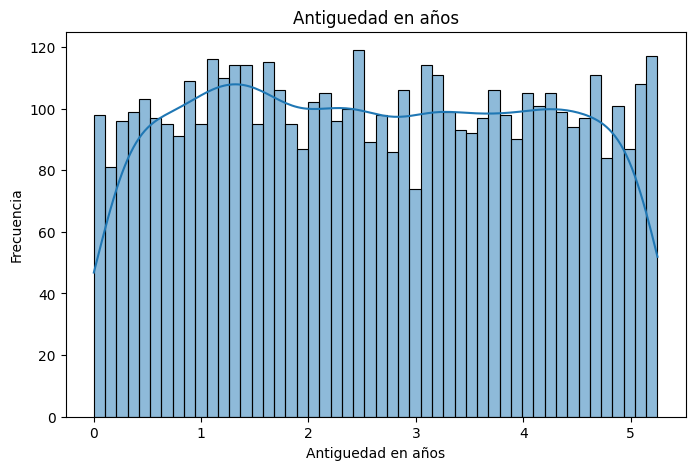

In [136]:
# --- Histograma de Calificaciones ---
plt.figure(figsize=(8, 5)) # Define el tamaño de la figura (opcional)
sns.histplot(data=df, x='Antiguedad en años',bins=50, kde=True) # kde=True añade una curva de densidad estimada
plt.title('Antiguedad en años')
plt.xlabel('Antiguedad en años')
plt.ylabel('Frecuencia')
plt.show() # Muestra el gráfico

# Observaciones del histograma:
# - Parece haber una concentración de calificaciones alrededor de 85-90.
# - La distribución no es perfectamente simétrica, quizás ligeramente sesgada a la izquierda (cola más larga hacia valores bajos).

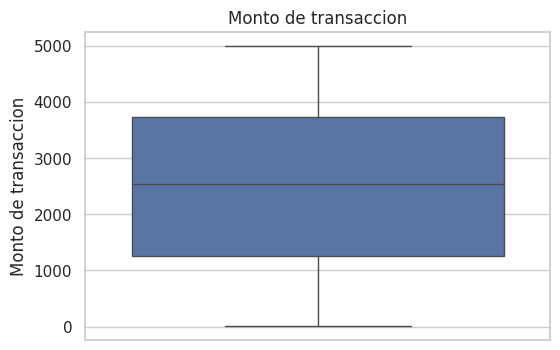

In [ ]:
# --- Box Plot de Calificaciones ---
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Monto de transaccion') # Usamos 'y' para un boxplot vertical
plt.title('Monto de transaccion')
plt.ylabel('Monto de transaccion')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


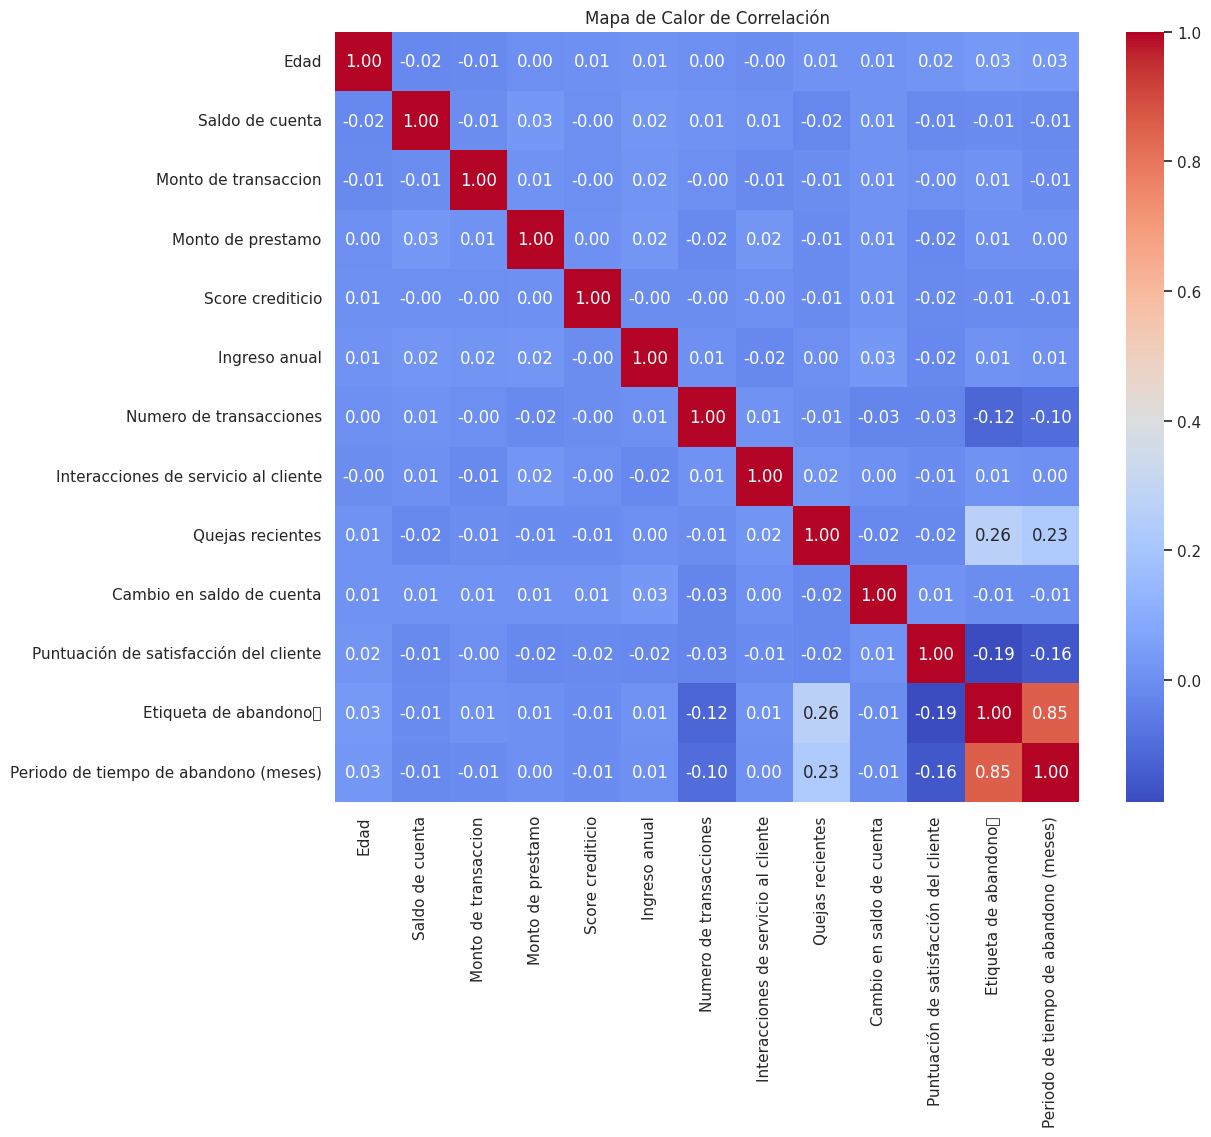

In [ ]:
# Calcula la matriz de correlaciones
# Selecciona solo columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

correlacion = df_numerico.corr()
plt.figure(figsize=(12, 10))  # Ajusta el tamaño del gráfico
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()